<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#282c5c;overflow:hidden;font-weight:500"><b>Coursera </b><br>EDA, Insights, Analysis</div>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt      
from ydata_profiling import ProfileReport
from wordcloud import WordCloud
%matplotlib inline  

# 🧾Lectura de Datos

In [3]:
df = pd.read_csv("UCoursera_Courses.csv")
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [5]:
#dropping first column
df=df.drop(['Unnamed: 0','course_organization'], axis=1)
df.head()

,course_title,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,COURSE,4.8,Mixed,320k


In [6]:
#converting course_students_enrolled values to integers

df.course_students_enrolled.replace(r'[km]+$', '', regex=True).astype(float)
df['course_students_enrolled']=(df.course_students_enrolled.replace(r'[km]+$', '', regex=True).astype(float)*df.course_students_enrolled.str.extract(r'[\d\.]+([km]+)', expand=False).replace(['k','m'], [10**3, 10**6])).astype('int64')

In [7]:
df.dtypes

course_title                 object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled      int64
dtype: object

In [10]:
df.describe()

,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


In [8]:
df.head()

,course_title,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,SPECIALIZATION,4.7,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,COURSE,4.7,Intermediate,17000
2,A Crash Course in Data Science,COURSE,4.5,Mixed,130000
3,A Law Student's Toolkit,COURSE,4.7,Mixed,91000
4,A Life of Happiness and Fulfillment,COURSE,4.8,Mixed,320000


In [9]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Pregunta a resolver:

¿Qué tanto influyen el precio, idioma, nivel y rating de cada curso en la demanda del producto vendido?

# 📉 Exploracion de Datos

<Axes: >

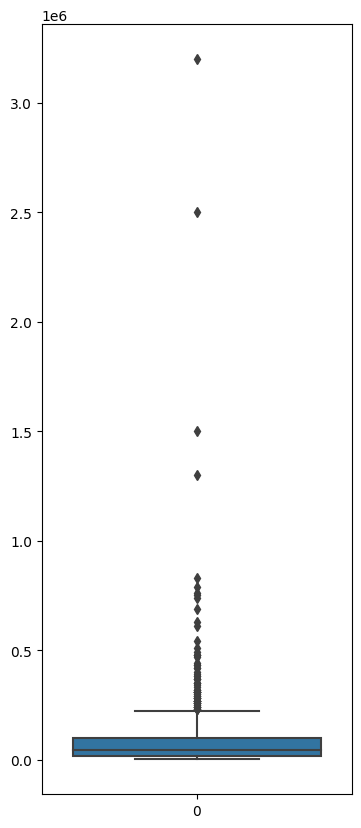

In [12]:
plt.figure(figsize=(4,10))
sns.boxplot(data=df.course_students_enrolled
)

Text(0.5, 1.0, '\n Distribucion de estudiantes matriculados\n')

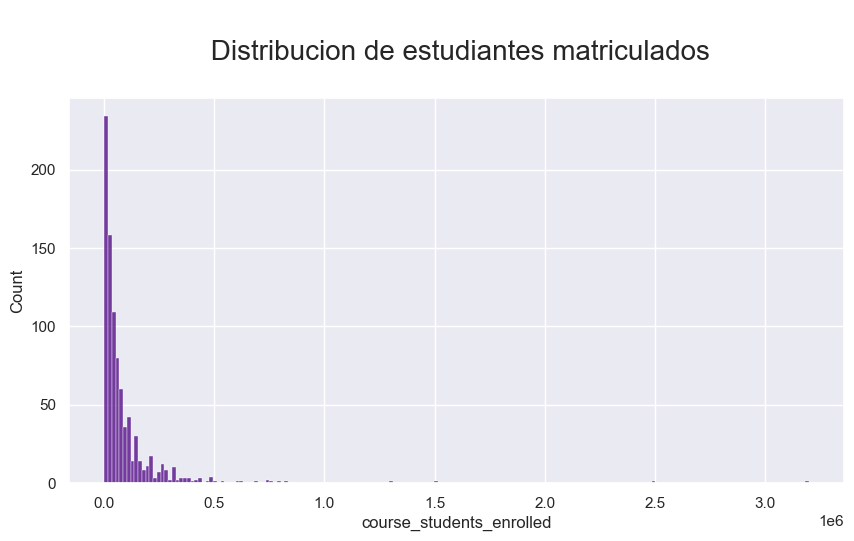

In [23]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.histplot(df['course_students_enrolled'],color='indigo')
p.axes.set_title("\n Distribucion de estudiantes matriculados\n",fontsize=20)

<Axes: >

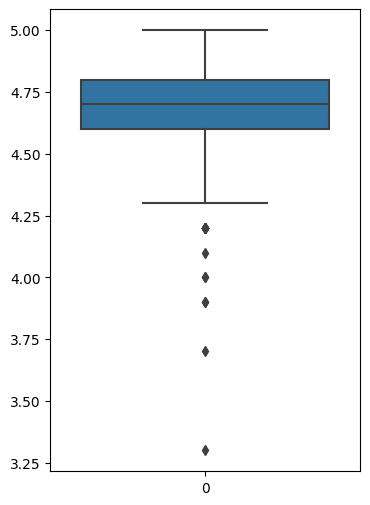

In [13]:
plt.figure(figsize=(4,6))
sns.boxplot(data=df.course_rating)

HISTOGRAMA

Text(0, 0.5, 'Frecuencia')

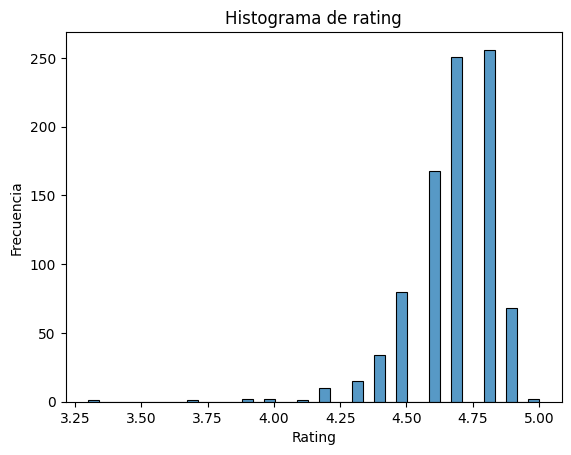

In [15]:

sns.histplot(data=df, x='course_rating')

# Personalizamos el título y los ejes 
plt.title('Histograma de rating')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')

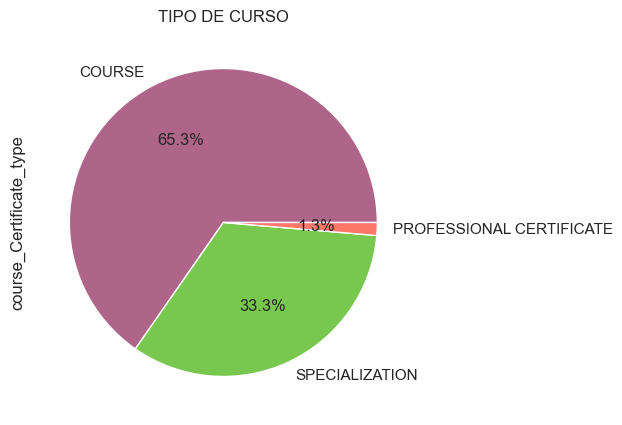

In [42]:
colors =  ["#AF6589FF", "#78C850","#FC766AFF"]
ax= df['course_Certificate_type'].value_counts(ascending=False).plot.pie(colors=colors,
            autopct='%1.1f%%',
            figsize=(8, 5))
plt.title('TIPO DE CURSO') 
plt.show()

<Axes: xlabel='course_difficulty', ylabel='count'>

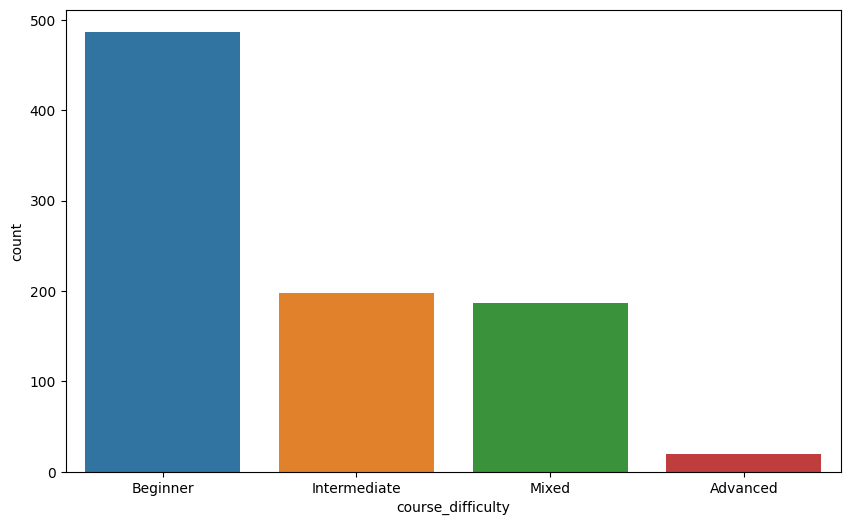

In [18]:
fig_dims = (10,6)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='course_difficulty',data = df,ax=ax)

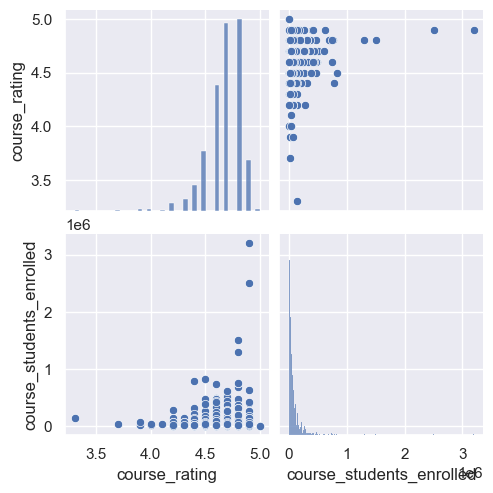

In [24]:
sns.pairplot(df)

Frecuencia del Rating basado en la Dificultad

Text(0.5, 1.0, '\nFrecuencia del Rating basado en la Dificultad\n')

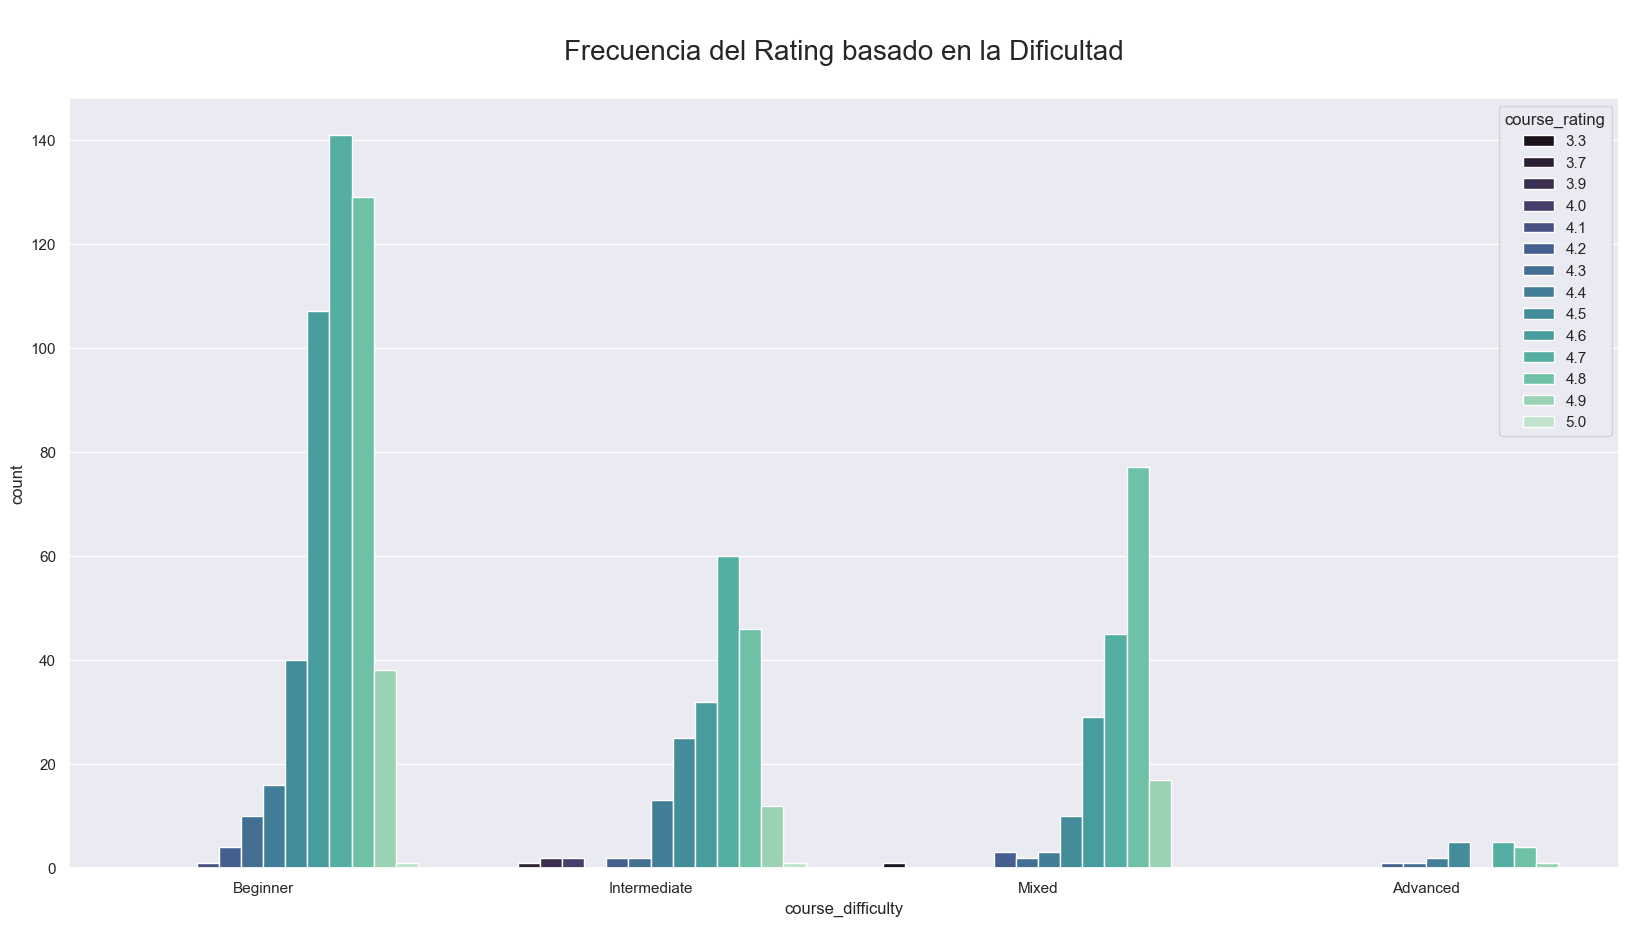

In [27]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(hue="course_rating", x="course_difficulty", data=df,palette="mako")
ax.axes.set_title("\nFrecuencia del Rating basado en la Dificultad\n",fontsize=20)

<b>Para responder a la pregunta sobre cómo influyen el precio, idioma, nivel y rating de cada curso en la demanda del producto vendido, podemos ayudarnos visualizando los siguientes graficos.<b>

# 🔍 Más EDA

POR CURSO

Text(0.5, 1.0, 'Top 20 Cursos con más Estudiantes Inscritos')

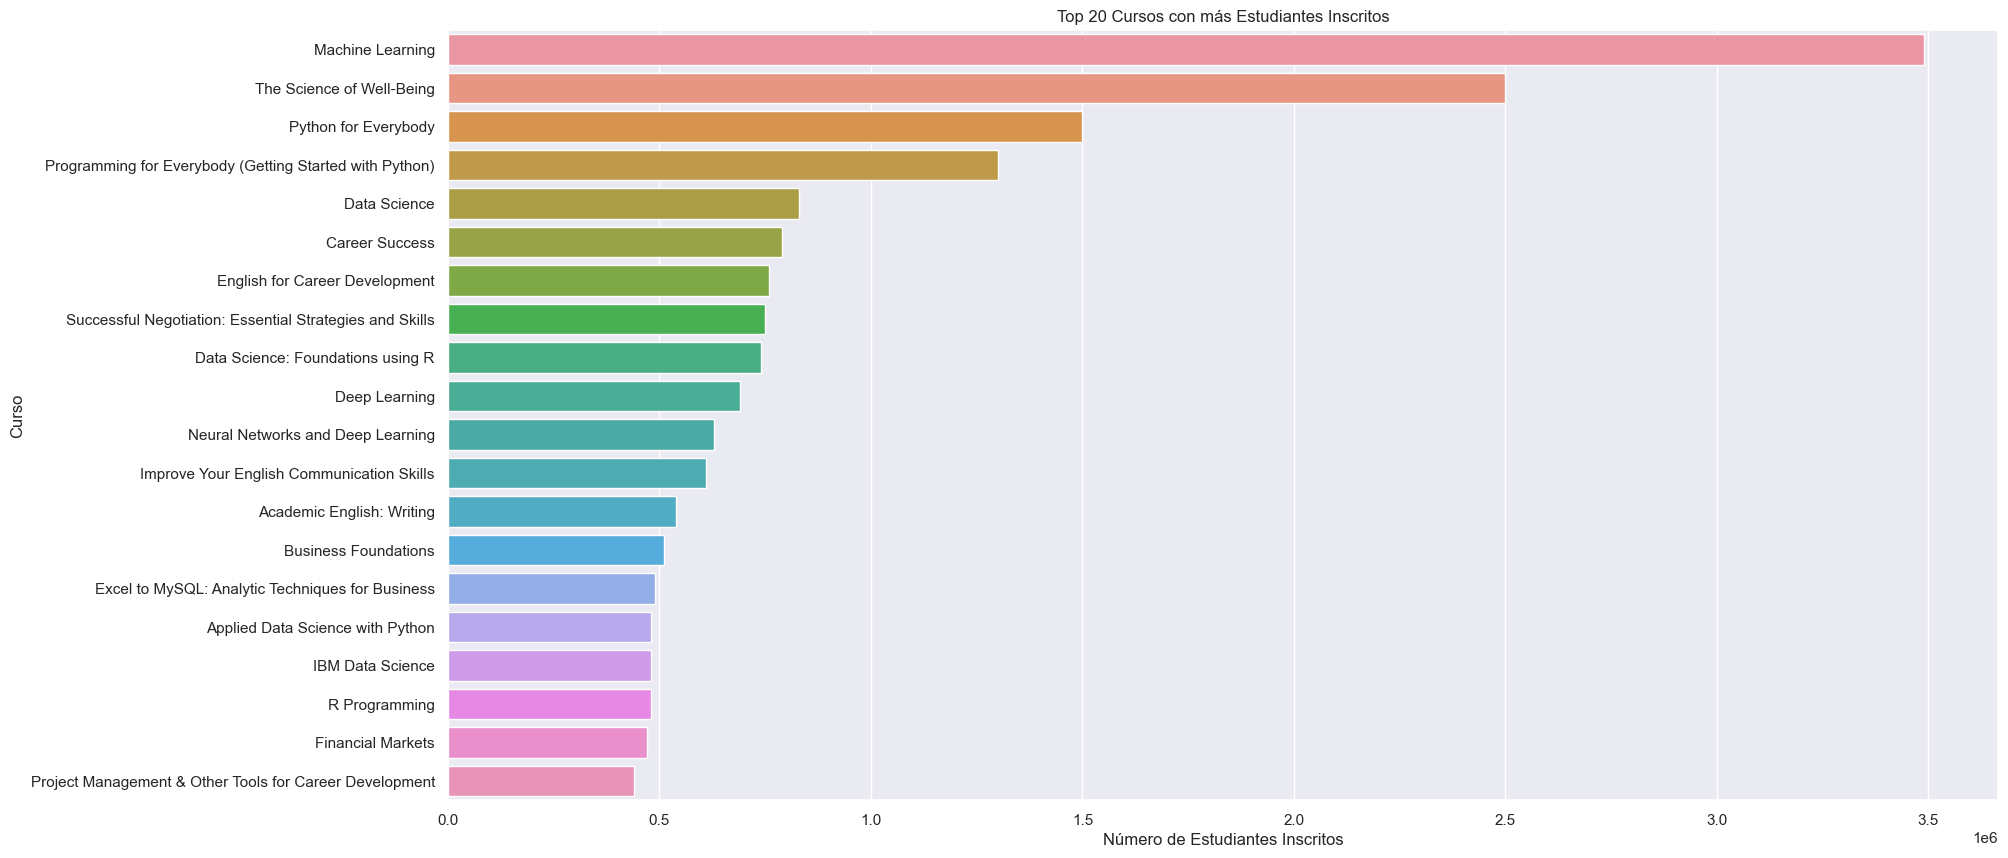

In [33]:
sns.set(style='darkgrid')

# Calculamos la suma de course_students_enrolled por curso
suma_inscritos_por_curso = df.groupby('course_title')['course_students_enrolled'].sum().reset_index()

# Ordenamos los datos por la columna 'course_students_enrolled' de forma descendente y seleccionamos los primeros 20 registros
top_20_cursos = suma_inscritos_por_curso.nlargest(20, 'course_students_enrolled')

# Creamos el gráfico de barras
sns.barplot(x='course_students_enrolled', y='course_title', data=top_20_cursos)

# Agregamos etiquetas a los ejes
plt.xlabel('Número de Estudiantes Inscritos')
plt.ylabel('Curso')
plt.title('Top 20 Cursos con más Estudiantes Inscritos')

Text(0.5, 1.0, 'Estudiantes Inscritos por Rating del Curso')

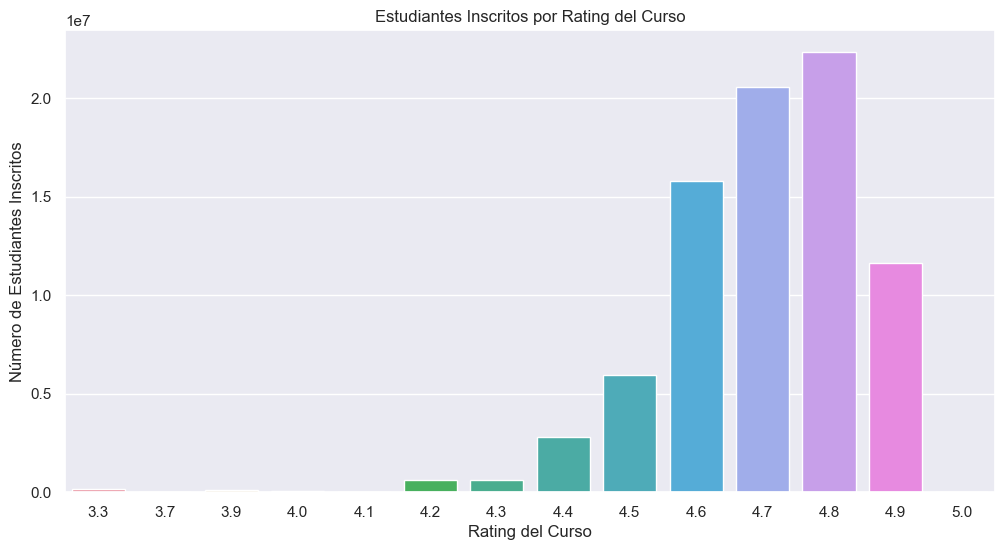

In [38]:
sns.set(style='darkgrid')

# Agrupamos los datos por rating y sumamos el número de estudiantes inscritos
rating_n_inscritos = df.groupby('course_rating')['course_students_enrolled'].sum().reset_index()

# Ordenamos los datos por rating de forma descendente
rating_n_inscritos_sorted = rating_n_inscritos.sort_values('course_rating', ascending=False)

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='course_rating', y='course_students_enrolled', data=rating_n_inscritos_sorted)

# Agregamos etiquetas a los ejes
plt.xlabel('Rating del Curso')
plt.ylabel('Número de Estudiantes Inscritos')
plt.title('Estudiantes Inscritos por Rating del Curso')

POR DIFICULTAD

Text(0.5, 1.0, 'Estudiantes Inscritos por Dificultad del Curso')

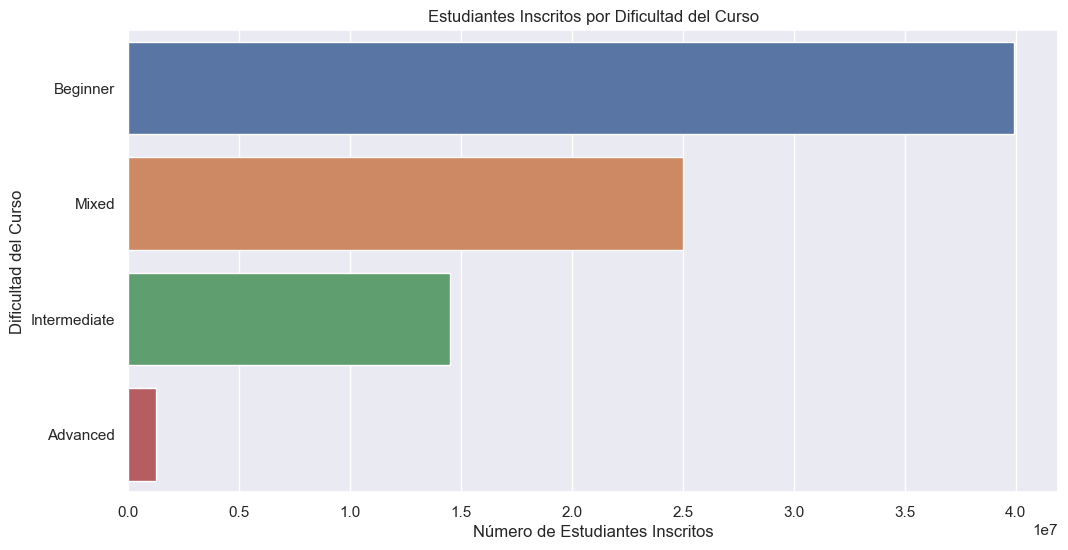

In [41]:

sns.set(style='darkgrid')

# Agrupamos los datos por dificultad y sumamos el número de estudiantes inscritos
dificultad_n_inscritos = df.groupby('course_difficulty')['course_students_enrolled'].sum().reset_index()

# Ordenamos los datos por dificultad de forma descendente
dificultad_n_inscritos_sorted = dificultad_n_inscritos.sort_values('course_students_enrolled', ascending=False)

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='course_students_enrolled', y='course_difficulty', data=dificultad_n_inscritos_sorted)

# Agregamos etiquetas a los ejes
plt.xlabel('Número de Estudiantes Inscritos')
plt.ylabel('Dificultad del Curso')
plt.title('Estudiantes Inscritos por Dificultad del Curso')

# ☁️✨
<b>CREAMOS UN WORDCLOUD CON LAS PALABRAS MAS COMUNES EN LOS TITULOS DE LOS CURSOS<b>

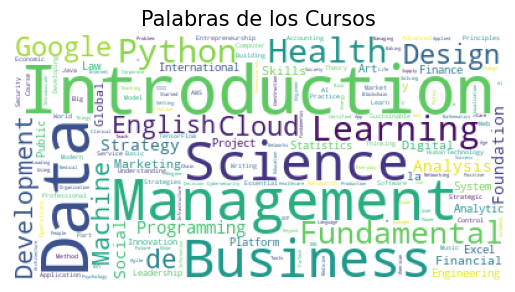

In [17]:
text = df["course_title"].values
wordcloud_for_travel=WordCloud(background_color='white',collocations=False).generate(" ".join(text))
plt.axis('off')
plt.title("Palabras de los Cursos",fontsize=15)
plt.imshow(wordcloud_for_travel)